## Song recommender

In [37]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="f5110ff0daf8441089149a96074b390c",
                                                           client_secret="7268a62acf854831a92215e95dc2f217"))


#### User playlists

In [36]:
playlist = sp.user_playlist_tracks("spotify", "1kWCcnLakmQ4jAbh0rpAh5")
playlist#.keys() # Let's look at items and total:

{'href': 'https://api.spotify.com/v1/playlists/1kWCcnLakmQ4jAbh0rpAh5/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2021-05-28T08:48:30Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/mejoreslistasspotify'},
    'href': 'https://api.spotify.com/v1/users/mejoreslistasspotify',
    'id': 'mejoreslistasspotify',
    'type': 'user',
    'uri': 'spotify:user:mejoreslistasspotify'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5FQ8tBUtIamA2hRtatrYUF'},
       'href': 'https://api.spotify.com/v1/artists/5FQ8tBUtIamA2hRtatrYUF',
       'id': '5FQ8tBUtIamA2hRtatrYUF',
       'name': 'Marc Seguí',
       'type': 'artist',
       'uri': 'spotify:artist:5FQ8tBUtIamA2hRtatrYUF'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/1mcTU81TzQhprhouKaTkpq'},
       'href': 'https://api.spotify.co

In [38]:
# It is limited to 100 tracks, we will have to fix it:

def get_playlist_tracks(username, playlist_id):
    
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

tracks = get_playlist_tracks("spotify", "1kWCcnLakmQ4jAbh0rpAh5")

In [39]:
# Getting all the artists

def get_artists_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        artist_per_song=[]
        
        for artist_info in artists_info:
            artist_per_song.append(artist_info['name'])
            
        artists.append(artist_per_song)
    
    return list(artists)

In [40]:
# Getting all the songs

def get_tracks_name_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    tracks = []
    
    for track in tracks_from_playlist:
        tracks.append(track['track']['name'])

    
    return list(tracks)

In [41]:
tracks = get_tracks_name_from_playlist("1kWCcnLakmQ4jAbh0rpAh5")
tracks

['Tiroteo - Remix',
 'La Cartita',
 'Porfa no te vayas',
 'Juramento eterno de sal',
 'PIN PIN',
 'EL TREN',
 'No me lo creo',
 'Como Si Nah (feat. KEVVO)',
 'The Business',
 'Tan Bonita',
 'Loco',
 'Me Enamora',
 'Se Apagó la Luz',
 'MÍRENME AHORA',
 'Y te pido perdón',
 'Mentiras',
 'Besarnos de cero',
 'Saturday',
 'Superstar',
 'Ahora sí',
 'Ayer (feat. Lautaro Lopez)',
 'Presente Y Futuro',
 'Corazón De Papel',
 'No te enamores (feat. Rvfv & Maikel Delacalle)',
 'CUENTA',
 'Girl From Rio',
 'Lo Tengo Todo',
 'Heartbreak Anthem (with David Guetta & Little Mix)',
 'La Pared 360',
 'Whoopty (Latin Mix) [feat. Anuel AA and Ozuna]',
 'Más De La Una',
 'Quiero que me olvides',
 'Loquita loca (feat. La Cebolla)',
 'Angelito',
 'Gira Gira',
 'Humedad',
 'Chamaquito',
 'Gol de Iniesta (feat. Enol y Manu Cort)',
 'Cuántas veces',
 'Jeans',
 'Young Loco',
 'Tengo dinero (feat. Israel B)',
 'BURBERRY',
 "Ponte Pa' Mi",
 'Miedito o Qué? (feat. KAROL G)',
 'En el bolsillo de mi corazón',
 'Ibal

In [42]:
# Getting all the songs

def get_tracks_ids_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    track_id = []
    
    for track in tracks_from_playlist:
        track_id.append(track['track']['id'])

    
    return list(set(track_id))

In [43]:
track_id = get_tracks_ids_from_playlist("1kWCcnLakmQ4jAbh0rpAh5")
len(track_id)

99

In [44]:
# Getting all the artists IDs

def get_artists_ids_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists_ids = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        for artist_info in artists_info:
            artists_ids.append(artist_info['id'])
            
    return list(set(artists_ids))

In [45]:
artists = get_artists_from_playlist("1kWCcnLakmQ4jAbh0rpAh5")
artists

[['Marc Seguí', 'Rauw Alejandro', 'Pol Granch'],
 ['Rasel', 'Keen Levy'],
 ['Beret', 'Morat'],
 ['Álvaro De Luna'],
 ['Myke Towers'],
 ['Micro TDH', 'Myke Towers'],
 ['Nyno Vargas'],
 ['Justin Quiles', 'Arcangel', 'Dalex', 'KEVVO'],
 ['Tiësto'],
 ['Piso 21'],
 ['Justin Quiles', 'Chimbala', 'Zion & Lennox'],
 ['Lenny Tavárez', 'Zion & Lennox'],
 ['Soge Culebra', 'Dollar Selmouni'],
 ['Myke Towers'],
 ['Carlos Baute', 'Juan Magán'],
 ['Marc Seguí'],
 ['Danny Ocean'],
 ['Twenty One Pilots'],
 ['Enol', 'Marmi'],
 ['Dudi'],
 ['bless', 'Lautaro Lopez'],
 ['Llane', 'Zion', 'Alvaro Diaz'],
 ['Leon Leiden', 'Karen Méndez'],
 ['Nyno Vargas', 'Rvfv', 'Maikel Delacalle'],
 ['Myke Towers'],
 ['Anitta'],
 ['Lenny Tavárez'],
 ['Galantis', 'David Guetta', 'Little Mix'],
 ['Lenny Tavárez', 'Justin Quiles'],
 ['CJ', 'Anuel AA', 'Ozuna'],
 ['Piso 21', 'Maluma'],
 ['Shakira Martínez', 'Pepe Bernabé'],
 ['Maki', 'La Cebolla'],
 ['Ovy On The Drums', 'Beéle', 'Bad Milk'],
 ['Las Villa', 'Harry Nach'],
 ['Sai

In [46]:
artists_ids = get_artists_ids_from_playlist("1kWCcnLakmQ4jAbh0rpAh5")
len(artists_ids)

134

In [47]:
import pandas as pd
df=pd.DataFrame(sp.audio_features(track_id))
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.688,0.751,0,-2.792,1,0.2600,0.10200,0.000004,0.0771,0.692,183.958,audio_features,4YqeXl57vJDYuEdcOL1vRD,spotify:track:4YqeXl57vJDYuEdcOL1vRD,https://api.spotify.com/v1/tracks/4YqeXl57vJDY...,https://api.spotify.com/v1/audio-analysis/4Yqe...,191410,4
1,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,audio_features,6lhZLbb0czULpjb2kFryPS,spotify:track:6lhZLbb0czULpjb2kFryPS,https://api.spotify.com/v1/tracks/6lhZLbb0czUL...,https://api.spotify.com/v1/audio-analysis/6lhZ...,200645,4
2,0.726,0.920,5,-2.988,1,0.0995,0.11500,0.000000,0.2270,0.755,89.962,audio_features,2TVnFqFnCki0TWhyzCYGtr,spotify:track:2TVnFqFnCki0TWhyzCYGtr,https://api.spotify.com/v1/tracks/2TVnFqFnCki0...,https://api.spotify.com/v1/audio-analysis/2TVn...,204735,4
3,0.779,0.554,5,-6.141,1,0.0479,0.34800,0.114000,0.0965,0.397,110.037,audio_features,7Kzn9GAvx70B8AupNR3JTz,spotify:track:7Kzn9GAvx70B8AupNR3JTz,https://api.spotify.com/v1/tracks/7Kzn9GAvx70B...,https://api.spotify.com/v1/audio-analysis/7Kzn...,172635,4
4,0.707,0.508,4,-7.699,0,0.0355,0.06650,0.000846,0.1520,0.428,122.022,audio_features,79mOxtLsVcwYZzusNoQ0Pz,spotify:track:79mOxtLsVcwYZzusNoQ0Pz,https://api.spotify.com/v1/tracks/79mOxtLsVcwY...,https://api.spotify.com/v1/audio-analysis/79mO...,186533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.548,0.697,0,-4.650,0,0.0429,0.18500,0.000020,0.8180,0.339,179.895,audio_features,30fnQJU6knLguvNGC6Lwjt,spotify:track:30fnQJU6knLguvNGC6Lwjt,https://api.spotify.com/v1/tracks/30fnQJU6knLg...,https://api.spotify.com/v1/audio-analysis/30fn...,171498,4
95,0.722,0.711,0,-5.787,1,0.1470,0.03030,0.004510,0.4660,0.553,112.031,audio_features,1Ic97InCaTy4fl9YtBsZuI,spotify:track:1Ic97InCaTy4fl9YtBsZuI,https://api.spotify.com/v1/tracks/1Ic97InCaTy4...,https://api.spotify.com/v1/audio-analysis/1Ic9...,172768,4
96,0.700,0.601,1,-6.581,1,0.2460,0.47200,0.000000,0.0664,0.710,99.540,audio_features,2q2xG0hEdZIDYK60uk5exj,spotify:track:2q2xG0hEdZIDYK60uk5exj,https://api.spotify.com/v1/tracks/2q2xG0hEdZID...,https://api.spotify.com/v1/audio-analysis/2q2x...,220800,4
97,0.464,0.898,2,-6.624,1,0.0592,0.00691,0.000000,0.1110,0.246,180.108,audio_features,18akmATft2x9dHOQ4WUTLH,spotify:track:18akmATft2x9dHOQ4WUTLH,https://api.spotify.com/v1/tracks/18akmATft2x9...,https://api.spotify.com/v1/audio-analysis/18ak...,175000,4


In [48]:
df['track']=pd.DataFrame(tracks)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track
0,0.688,0.751,0,-2.792,1,0.2600,0.10200,0.000004,0.0771,0.692,183.958,audio_features,4YqeXl57vJDYuEdcOL1vRD,spotify:track:4YqeXl57vJDYuEdcOL1vRD,https://api.spotify.com/v1/tracks/4YqeXl57vJDY...,https://api.spotify.com/v1/audio-analysis/4Yqe...,191410,4,Tiroteo - Remix
1,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,audio_features,6lhZLbb0czULpjb2kFryPS,spotify:track:6lhZLbb0czULpjb2kFryPS,https://api.spotify.com/v1/tracks/6lhZLbb0czUL...,https://api.spotify.com/v1/audio-analysis/6lhZ...,200645,4,La Cartita
2,0.726,0.920,5,-2.988,1,0.0995,0.11500,0.000000,0.2270,0.755,89.962,audio_features,2TVnFqFnCki0TWhyzCYGtr,spotify:track:2TVnFqFnCki0TWhyzCYGtr,https://api.spotify.com/v1/tracks/2TVnFqFnCki0...,https://api.spotify.com/v1/audio-analysis/2TVn...,204735,4,Porfa no te vayas
3,0.779,0.554,5,-6.141,1,0.0479,0.34800,0.114000,0.0965,0.397,110.037,audio_features,7Kzn9GAvx70B8AupNR3JTz,spotify:track:7Kzn9GAvx70B8AupNR3JTz,https://api.spotify.com/v1/tracks/7Kzn9GAvx70B...,https://api.spotify.com/v1/audio-analysis/7Kzn...,172635,4,Juramento eterno de sal
4,0.707,0.508,4,-7.699,0,0.0355,0.06650,0.000846,0.1520,0.428,122.022,audio_features,79mOxtLsVcwYZzusNoQ0Pz,spotify:track:79mOxtLsVcwYZzusNoQ0Pz,https://api.spotify.com/v1/tracks/79mOxtLsVcwY...,https://api.spotify.com/v1/audio-analysis/79mO...,186533,4,PIN PIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.548,0.697,0,-4.650,0,0.0429,0.18500,0.000020,0.8180,0.339,179.895,audio_features,30fnQJU6knLguvNGC6Lwjt,spotify:track:30fnQJU6knLguvNGC6Lwjt,https://api.spotify.com/v1/tracks/30fnQJU6knLg...,https://api.spotify.com/v1/audio-analysis/30fn...,171498,4,Jerusalema (feat. Burna Boy & Nomcebo Zikode) ...
95,0.722,0.711,0,-5.787,1,0.1470,0.03030,0.004510,0.4660,0.553,112.031,audio_features,1Ic97InCaTy4fl9YtBsZuI,spotify:track:1Ic97InCaTy4fl9YtBsZuI,https://api.spotify.com/v1/tracks/1Ic97InCaTy4...,https://api.spotify.com/v1/audio-analysis/1Ic9...,172768,4,Head & Heart (feat. MNEK)
96,0.700,0.601,1,-6.581,1,0.2460,0.47200,0.000000,0.0664,0.710,99.540,audio_features,2q2xG0hEdZIDYK60uk5exj,spotify:track:2q2xG0hEdZIDYK60uk5exj,https://api.spotify.com/v1/tracks/2q2xG0hEdZID...,https://api.spotify.com/v1/audio-analysis/2q2x...,220800,4,Inolvidable
97,0.464,0.898,2,-6.624,1,0.0592,0.00691,0.000000,0.1110,0.246,180.108,audio_features,18akmATft2x9dHOQ4WUTLH,spotify:track:18akmATft2x9dHOQ4WUTLH,https://api.spotify.com/v1/tracks/18akmATft2x9...,https://api.spotify.com/v1/audio-analysis/18ak...,175000,4,Lakilove


In [49]:
df['artist']=pd.Series(artists)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track,artist
0,0.688,0.751,0,-2.792,1,0.2600,0.10200,0.000004,0.0771,0.692,183.958,audio_features,4YqeXl57vJDYuEdcOL1vRD,spotify:track:4YqeXl57vJDYuEdcOL1vRD,https://api.spotify.com/v1/tracks/4YqeXl57vJDY...,https://api.spotify.com/v1/audio-analysis/4Yqe...,191410,4,Tiroteo - Remix,"[Marc Seguí, Rauw Alejandro, Pol Granch]"
1,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,audio_features,6lhZLbb0czULpjb2kFryPS,spotify:track:6lhZLbb0czULpjb2kFryPS,https://api.spotify.com/v1/tracks/6lhZLbb0czUL...,https://api.spotify.com/v1/audio-analysis/6lhZ...,200645,4,La Cartita,"[Rasel, Keen Levy]"
2,0.726,0.920,5,-2.988,1,0.0995,0.11500,0.000000,0.2270,0.755,89.962,audio_features,2TVnFqFnCki0TWhyzCYGtr,spotify:track:2TVnFqFnCki0TWhyzCYGtr,https://api.spotify.com/v1/tracks/2TVnFqFnCki0...,https://api.spotify.com/v1/audio-analysis/2TVn...,204735,4,Porfa no te vayas,"[Beret, Morat]"
3,0.779,0.554,5,-6.141,1,0.0479,0.34800,0.114000,0.0965,0.397,110.037,audio_features,7Kzn9GAvx70B8AupNR3JTz,spotify:track:7Kzn9GAvx70B8AupNR3JTz,https://api.spotify.com/v1/tracks/7Kzn9GAvx70B...,https://api.spotify.com/v1/audio-analysis/7Kzn...,172635,4,Juramento eterno de sal,[Álvaro De Luna]
4,0.707,0.508,4,-7.699,0,0.0355,0.06650,0.000846,0.1520,0.428,122.022,audio_features,79mOxtLsVcwYZzusNoQ0Pz,spotify:track:79mOxtLsVcwYZzusNoQ0Pz,https://api.spotify.com/v1/tracks/79mOxtLsVcwY...,https://api.spotify.com/v1/audio-analysis/79mO...,186533,4,PIN PIN,[Myke Towers]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.548,0.697,0,-4.650,0,0.0429,0.18500,0.000020,0.8180,0.339,179.895,audio_features,30fnQJU6knLguvNGC6Lwjt,spotify:track:30fnQJU6knLguvNGC6Lwjt,https://api.spotify.com/v1/tracks/30fnQJU6knLg...,https://api.spotify.com/v1/audio-analysis/30fn...,171498,4,Jerusalema (feat. Burna Boy & Nomcebo Zikode) ...,"[Master KG, Burna Boy, Nomcebo Zikode]"
95,0.722,0.711,0,-5.787,1,0.1470,0.03030,0.004510,0.4660,0.553,112.031,audio_features,1Ic97InCaTy4fl9YtBsZuI,spotify:track:1Ic97InCaTy4fl9YtBsZuI,https://api.spotify.com/v1/tracks/1Ic97InCaTy4...,https://api.spotify.com/v1/audio-analysis/1Ic9...,172768,4,Head & Heart (feat. MNEK),"[Joel Corry, MNEK]"
96,0.700,0.601,1,-6.581,1,0.2460,0.47200,0.000000,0.0664,0.710,99.540,audio_features,2q2xG0hEdZIDYK60uk5exj,spotify:track:2q2xG0hEdZIDYK60uk5exj,https://api.spotify.com/v1/tracks/2q2xG0hEdZID...,https://api.spotify.com/v1/audio-analysis/2q2x...,220800,4,Inolvidable,"[Ovy On The Drums, Beéle]"
97,0.464,0.898,2,-6.624,1,0.0592,0.00691,0.000000,0.1110,0.246,180.108,audio_features,18akmATft2x9dHOQ4WUTLH,spotify:track:18akmATft2x9dHOQ4WUTLH,https://api.spotify.com/v1/tracks/18akmATft2x9...,https://api.spotify.com/v1/audio-analysis/18ak...,175000,4,Lakilove,"[Oques Grasses, Doble]"


In [50]:
df.drop(columns =['uri', 'track_href', 'analysis_url', 'type'], inplace =True)

In [51]:
df_kmeans=df.drop(columns=['track', 'id', 'artist'])

In [52]:
X=df_kmeans
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.688,0.751,0,-2.792,1,0.2600,0.10200,0.000004,0.0771,0.692,183.958,191410,4
1,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4
2,0.726,0.920,5,-2.988,1,0.0995,0.11500,0.000000,0.2270,0.755,89.962,204735,4
3,0.779,0.554,5,-6.141,1,0.0479,0.34800,0.114000,0.0965,0.397,110.037,172635,4
4,0.707,0.508,4,-7.699,0,0.0355,0.06650,0.000846,0.1520,0.428,122.022,186533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.548,0.697,0,-4.650,0,0.0429,0.18500,0.000020,0.8180,0.339,179.895,171498,4
95,0.722,0.711,0,-5.787,1,0.1470,0.03030,0.004510,0.4660,0.553,112.031,172768,4
96,0.700,0.601,1,-6.581,1,0.2460,0.47200,0.000000,0.0664,0.710,99.540,220800,4
97,0.464,0.898,2,-6.624,1,0.0592,0.00691,0.000000,0.1110,0.246,180.108,175000,4


In [53]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

scaled_df=pd.DataFrame(X_prep, columns=X.columns)
scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.393425,0.418882,-1.333827,1.543359,0.876275,1.366473,-0.616255,-0.228229,-0.635338,0.357191,1.626368,-0.123342,0.205196
1,-0.669509,1.380607,0.016366,0.816410,0.876275,-0.934329,-1.127410,-0.137077,3.536495,-1.495049,-1.100121,0.199611,0.205196
2,0.010082,1.808041,0.016366,1.427802,0.876275,-0.268227,-0.544941,-0.228376,0.598353,0.701413,-1.191124,0.342641,0.205196
3,0.572869,-1.200434,0.016366,-0.431136,0.876275,-0.793775,0.733220,4.037224,-0.475674,-1.254640,-0.589384,-0.779915,0.205196
4,-0.191671,-1.578548,-0.253673,-1.349698,-1.141195,-0.920070,-0.810997,-0.196720,-0.018904,-1.085261,-0.230139,-0.293894,0.205196


In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [57]:
clusters = kmeans.predict(X_prep)
clusters

array([7, 6, 0, 5, 3, 1, 1, 1, 7, 1, 0, 7, 1, 0, 7, 2, 2, 5, 3, 7, 6, 2,
       7, 2, 7, 0, 0, 1, 2, 7, 6, 7, 2, 0, 0, 0, 3, 7, 7, 1, 2, 2, 2, 2,
       5, 7, 7, 3, 3, 3, 0, 2, 1, 2, 0, 2, 2, 1, 4, 0, 0, 7, 2, 1, 7, 3,
       6, 7, 0, 0, 0, 3, 1, 0, 0, 4, 7, 6, 0, 2, 2, 0, 4, 2, 2, 0, 1, 3,
       1, 1, 2, 4, 0, 1, 6, 6, 1, 7, 3], dtype=int32)

In [58]:
pd.Series(clusters).value_counts().sort_index()

0    21
1    16
2    20
3    10
4     4
5     3
6     7
7    18
dtype: int64

In [59]:
# elbow method
K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[1145.4215669471919,
 1041.7132335185522,
 932.4267014572165,
 869.7375636945544,
 780.5730543831743,
 739.069340008204,
 698.2540438378919,
 675.4415644475062,
 639.2409071739434,
 621.8037021069101,
 587.7974502499934,
 563.3735069871274,
 556.1025095134833,
 524.6566485698933,
 506.54728887715936,
 476.7737852379758,
 473.11430776520984,
 452.23485216133355]

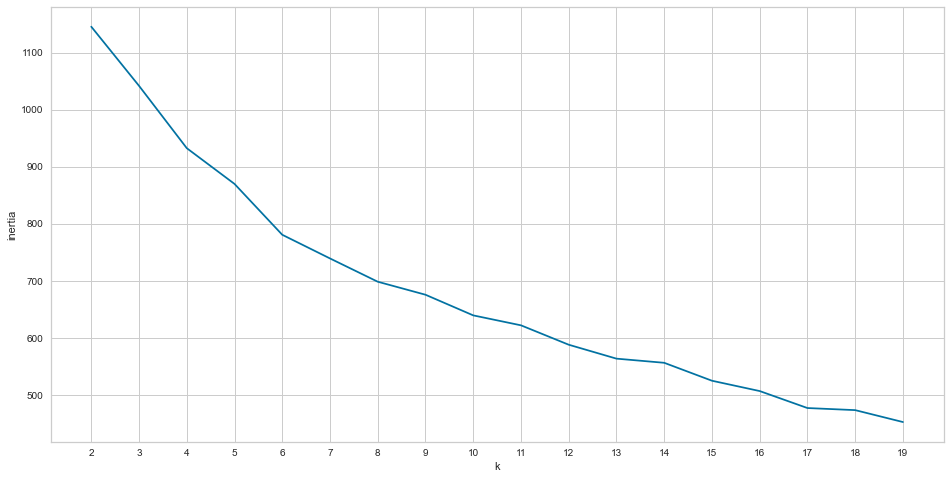

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

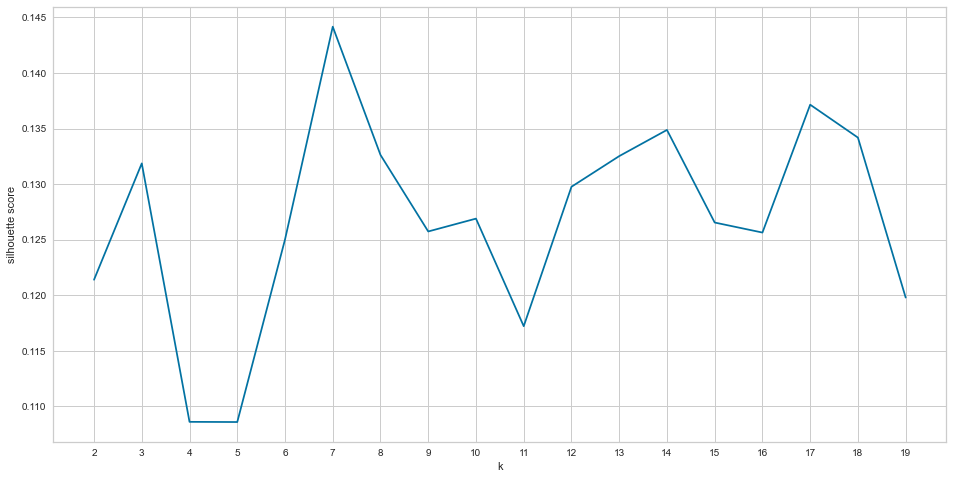

In [61]:
#Silhouette Score


from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

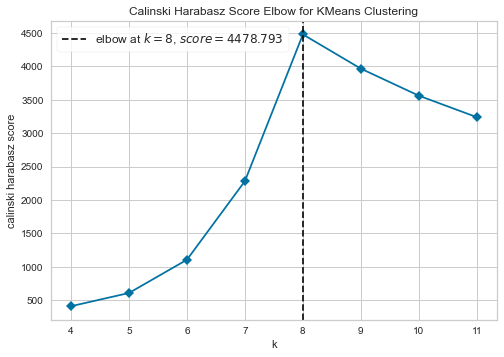

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [62]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X_prep, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X_prep)        # Fit the data to the visualizer
visualizer.show()

In [63]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=1234)

In [64]:
X_prep.shape

(1000, 12)

In [65]:
#get df
#try kmeans
#cluster
#apply the logic, if the song is in Billboard return Billboard, if not, recommend a similar song (closest in freatures) from spotify

In [69]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

NameError: name 'X_2D' is not defined